In [1]:
# 기본 데이터 정리 및 처리
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# 전처리 및 머신 러닝 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB


# 경고 제거 (판다스가 에러 메세지를 자주 만들어 내기 때문에 이를 일단 무시하도록 설정합니다.)
import sys

import warnings

import warnings
warnings.filterwarnings('ignore')

ImportError: cannot import name 'RandomForestRegression' from 'sklearn.ensemble' (C:\Users\96253\anaconda3\lib\site-packages\sklearn\ensemble\__init__.py)

In [84]:

import os
os.chdir('C:/Users/user/Desktop/구내식당 식수 인원 예측 AI 경진대회')

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


In [85]:
train.head(n=10)

train.describe(include='all')

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
count,1205,1205,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205,1205,1205,1205.000000,1205.000000
unique,1205,5,NaN,NaN,NaN,NaN,NaN,1204,1198,1168,NaN,NaN
top,2018-12-13,목,NaN,NaN,NaN,NaN,NaN,모닝롤/프렌치토스트 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 무채국 김...,콩나물밥*양념장 (쌀:국내산) 팽이장국 치킨핑거*요거트드레싱 꽃맛살샐러드 얼갈...,*,NaN,NaN
freq,1,244,NaN,NaN,NaN,NaN,NaN,2,2,19,NaN,NaN
mean,NaN,NaN,2807.815768,157.913693,241.142739,274.117012,43.506224,NaN,NaN,NaN,890.334440,461.772614
std,NaN,NaN,171.264404,144.190572,43.532298,246.239651,109.937400,NaN,NaN,NaN,209.505057,139.179202
min,NaN,NaN,2601.000000,23.000000,41.000000,0.000000,0.000000,NaN,NaN,NaN,296.000000,0.000000
25%,NaN,NaN,2645.000000,71.000000,217.000000,4.000000,0.000000,NaN,NaN,NaN,758.000000,406.000000
50%,NaN,NaN,2760.000000,105.000000,245.000000,299.000000,0.000000,NaN,NaN,NaN,879.000000,483.000000
75%,NaN,NaN,2962.000000,185.000000,272.000000,452.000000,0.000000,NaN,NaN,NaN,1032.000000,545.000000


In [86]:
train.dtypes

일자                 object
요일                 object
본사정원수               int64
본사휴가자수              int64
본사출장자수              int64
본사시간외근무명령서승인건수      int64
현본사소속재택근무자수       float64
조식메뉴               object
중식메뉴               object
석식메뉴               object
중식계               float64
석식계               float64
dtype: object

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [88]:
train=train.drop(columns=train.columns[7:10])

In [89]:
train

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0
...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,1093.0,421.0
1201,2021-01-21,목,2983,92,231,462,351.0,832.0,353.0
1202,2021-01-22,금,2983,255,248,1,303.0,579.0,217.0
1203,2021-01-25,월,2983,107,153,616,327.0,1145.0,502.0


In [90]:
train.corr()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
본사정원수,1.000000,0.244666,-0.061688,0.146544,0.452293,-0.115529,-0.173852
본사휴가자수,0.244666,1.000000,-0.273318,-0.230789,0.065397,-0.391975,-0.316894
본사출장자수,-0.061688,-0.273318,1.000000,-0.308757,-0.352643,-0.512680,-0.188164
본사시간외근무명령서승인건수,0.146544,-0.230789,-0.308757,1.000000,0.156792,0.535611,0.571168
현본사소속재택근무자수,0.452293,0.065397,-0.352643,0.156792,1.000000,0.076509,-0.057534
중식계,-0.115529,-0.391975,-0.512680,0.535611,0.076509,1.000000,0.508287
석식계,-0.173852,-0.316894,-0.188164,0.571168,-0.057534,0.508287,1.000000


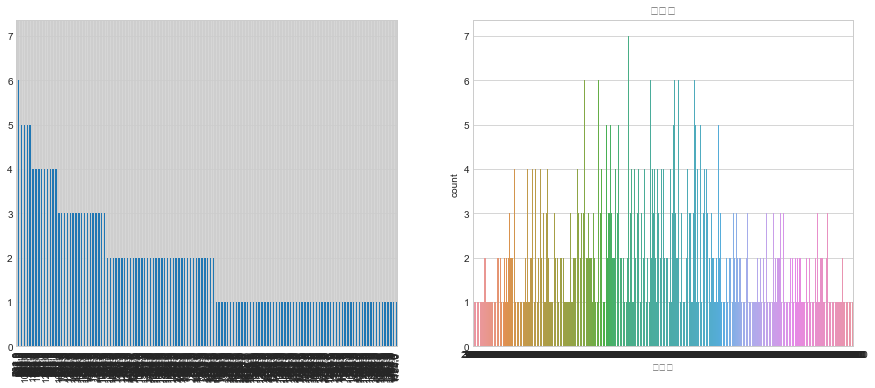

In [91]:
f,ax=plt.subplots(1, 2, figsize=(15, 6))
train['중식계'].value_counts().plot.bar(ax=ax[0])
ax[0].set_ylabel('')
sns.countplot('중식계',data=train, ax=ax[1])
ax[1].set_title('중식계')
plt.show()

In [92]:
train[['본사정원수','중식계']].groupby(['본사정원수']).mean()


,중식계
본사정원수,
2601,967.888889
2624,962.227273
2626,868.050000
2627,948.000000
2632,1024.700000
2635,943.400000
2637,897.275000
2642,905.000000
2643,899.048780


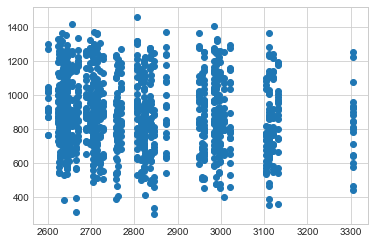

In [93]:

plt.scatter(train.본사정원수, train.중식계)


In [94]:
# .str.split을 이용한 년/월 추출
train['연도'] = train['일자'].str.split('-', expand = True).iloc[:, 0].astype(int)
train['월'] = train['일자'].str.split('-', expand = True).iloc[:, 1].astype(int)
train['일'] = train['일자'].str.split('-', expand = True).iloc[:, 2].astype(int)
train

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,연도,월,일
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,2016,2,1
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,2016,2,2
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0,2016,2,3
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0,2016,2,4
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0,2016,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,1093.0,421.0,2021,1,20
1201,2021-01-21,목,2983,92,231,462,351.0,832.0,353.0,2021,1,21
1202,2021-01-22,금,2983,255,248,1,303.0,579.0,217.0,2021,1,22
1203,2021-01-25,월,2983,107,153,616,327.0,1145.0,502.0,2021,1,25


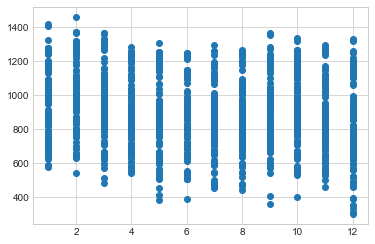

In [95]:
plt.scatter(train.월, train.중식계)

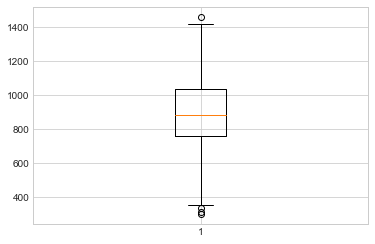

In [96]:
plt.boxplot(train.중식계)

plt.show()


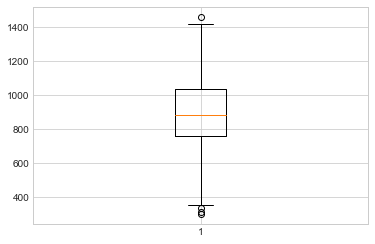

In [97]:
plt.boxplot(train['중식계'])

plt.show()

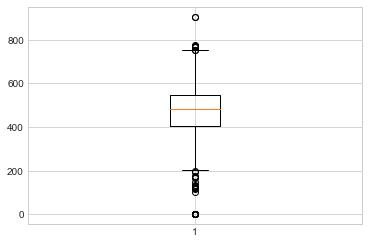

In [98]:
plt.boxplot(train.석식계)
plt.show()

In [99]:
train.head(n=15)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,연도,월,일
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,2016,2,1
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,2016,2,2
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0,2016,2,3
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0,2016,2,4
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0,2016,2,5
5,2016-02-11,목,2601,383,143,417,0.0,1045.0,550.0,2016,2,11
6,2016-02-12,금,2601,389,156,93,0.0,909.0,598.0,2016,2,12
7,2016-02-15,월,2601,87,204,482,0.0,1268.0,672.0,2016,2,15
8,2016-02-16,화,2601,72,236,526,0.0,1014.0,523.0,2016,2,16
9,2016-02-17,수,2601,78,250,23,0.0,916.0,588.0,2016,2,17


In [100]:
train['근무자수'] = (train['본사정원수']- train['본사휴가자수']-train['본사출장자수']-train['본사시간외근무명령서승인건수'])

In [101]:
train

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,연도,월,일,근무자수
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,2016,2,1,2163
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,2016,2,2,2059
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0,2016,2,3,2254
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0,2016,2,4,1922
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0,2016,2,5,2108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,1093.0,421.0,2021,1,20,2706
1201,2021-01-21,목,2983,92,231,462,351.0,832.0,353.0,2021,1,21,2198
1202,2021-01-22,금,2983,255,248,1,303.0,579.0,217.0,2021,1,22,2479
1203,2021-01-25,월,2983,107,153,616,327.0,1145.0,502.0,2021,1,25,2107


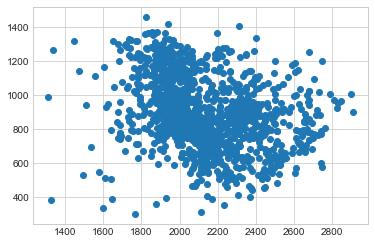

In [102]:
plt.scatter(train.근무자수, train.중식계)

{'whiskers': [<matplotlib.lines.Line2D at 0x18984e4db20>,
 'caps': [<matplotlib.lines.Line2D at 0x18988179b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x18985d32730>],
 'medians': [<matplotlib.lines.Line2D at 0x18986c2feb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18986bc97f0>],
 'means': []}

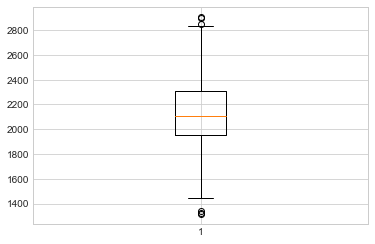

In [103]:
plt.boxplot(train.근무자수)

In [104]:
max(train.근무자수-train.중식계)

2171.0

In [105]:
min(train.근무자수-train.중식계)

75.0

In [106]:
#석식에 0이 수가 있어서 제외시키기  
trainn=train
trainn.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,연도,월,일,근무자수
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,2016,2,1,2163
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,2016,2,2,2059
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0,2016,2,3,2254
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0,2016,2,4,1922
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0,2016,2,5,2108


In [107]:

trainn=trainn.drop(trainn.loc[trainn.석식계==0].index)

In [108]:
trainn.shape

(1162, 13)

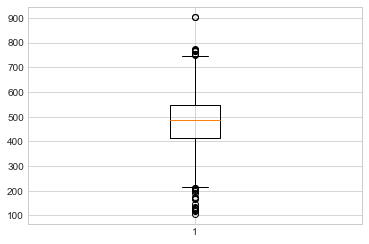

In [109]:
plt.boxplot(trainn.석식계)
plt.show()

In [110]:
sum(train.석식계==0)

43

In [111]:
sum(trainn.석식계==0)

0

In [112]:
max(trainn.근무자수-trainn.석식계)

2509.0

In [113]:
min(trainn.근무자수-trainn.석식계) #근무한 사람 중 석식을 안먹은 사람이 제일 적은날 

435.0

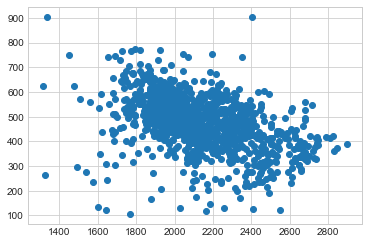

In [114]:
plt.scatter(trainn.근무자수, trainn.석식계) #야근하거나 밥을 먹고가는 사람들 

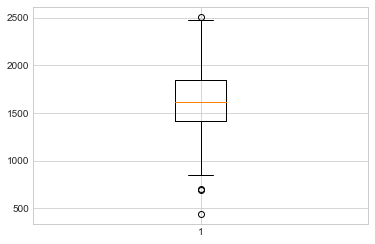

In [115]:
plt.boxplot(trainn.근무자수-trainn.석식계)
plt.show()

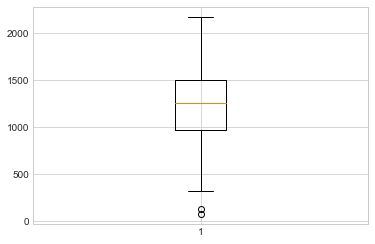

In [116]:
plt.boxplot(train.근무자수-train.중식계)
plt.show()

In [118]:
train

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,연도,월,일,근무자수
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,2016,2,1,2163
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,2016,2,2,2059
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0,2016,2,3,2254
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0,2016,2,4,1922
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0,2016,2,5,2108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,1093.0,421.0,2021,1,20,2706
1201,2021-01-21,목,2983,92,231,462,351.0,832.0,353.0,2021,1,21,2198
1202,2021-01-22,금,2983,255,248,1,303.0,579.0,217.0,2021,1,22,2479
1203,2021-01-25,월,2983,107,153,616,327.0,1145.0,502.0,2021,1,25,2107


In [121]:
       
x_train = train[['월','일', '근무자수', '본사정원수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']]

y1_train = train['중식계']
y2_train = trainn['석식계']



In [149]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_jobs=-1, random_state=42)
model2 = RandomForestRegressor(n_jobs=-1, random_state=42)

model1.fit(x_train, y1_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [165]:
test['연도'] = train['일자'].str.split('-', expand = True).iloc[:, 0].astype(int)
test['월'] = train['일자'].str.split('-', expand = True).iloc[:, 1].astype(int)
test['일'] = train['일자'].str.split('-', expand = True).iloc[:, 2].astype(int)

test['근무자수'] = (test['본사정원수']- test['본사휴가자수']-test['본사출장자수']-test['본사시간외근무명령서승인건수'])


test.head()


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,연도,월,일,근무자수
0,2021-01-27,NaN,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,2016,2,1,2708
1,2021-01-28,NaN,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지,2016,2,2,2258
2,2021-01-29,NaN,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치,2016,2,3,2464
3,2021-02-01,NaN,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치,2016,2,4,2124
4,2021-02-02,NaN,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치,2016,2,5,2221


In [170]:
train['요일'] = train['요일'].map({'월':1, '화':2, '수':3, '목':4, '금':5})
test['요일'] = test['요일'].map({'월':1, '화':2, '수':3, '목':4, '금':5})
trainn['요일'] = trainn['요일'].map({'월':1, '화':2, '수':3, '목':4, '금':5})


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,연도,월,일,근무자수
0,2016-02-01,NaN,2601,50,150,238,0.0,1039.0,331.0,2016,2,1,2163
1,2016-02-02,NaN,2601,50,173,319,0.0,867.0,560.0,2016,2,2,2059
2,2016-02-03,NaN,2601,56,180,111,0.0,1017.0,573.0,2016,2,3,2254
3,2016-02-04,NaN,2601,104,220,355,0.0,978.0,525.0,2016,2,4,1922
4,2016-02-05,NaN,2601,278,181,34,0.0,925.0,330.0,2016,2,5,2108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,NaN,2983,75,198,4,391.0,1093.0,421.0,2021,1,20,2706
1201,2021-01-21,NaN,2983,92,231,462,351.0,832.0,353.0,2021,1,21,2198
1202,2021-01-22,NaN,2983,255,248,1,303.0,579.0,217.0,2021,1,22,2479
1203,2021-01-25,NaN,2983,107,153,616,327.0,1145.0,502.0,2021,1,25,2107


In [169]:
x_train = train[['요일','월','일', '근무자수', '본사정원수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']]
x_trainn = trainn[['요일','월','일', '근무자수', '본사정원수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']]

y1_train = train['중식계']
y2_train = trainn['석식계']


x_test = test[['요일','월','일', '근무자수', '본사정원수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']]


,요일,월,일,근무자수,본사정원수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
0,NaN,2,1,2163,2601,150,238,0.0
1,NaN,2,2,2059,2601,173,319,0.0
2,NaN,2,3,2254,2601,180,111,0.0
3,NaN,2,4,1922,2601,220,355,0.0
4,NaN,2,5,2108,2601,181,34,0.0
...,...,...,...,...,...,...,...,...
1200,NaN,1,20,2706,2983,198,4,391.0
1201,NaN,1,21,2198,2983,231,462,351.0
1202,NaN,1,22,2479,2983,248,1,303.0
1203,NaN,1,25,2107,2983,153,616,327.0


In [168]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_jobs=-1, random_state=42, criterion = 'mae')
model2 = RandomForestRegressor(n_jobs=-1, random_state=42, criterion = 'mae')

model1.fit(x_train, y1_train)
model2.fit(x_trainn, y2_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [145]:
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)

In [146]:
submission['중식계'] = pred1
submission['석식계'] = pred2

In [147]:
submission = pd.read_csv("sample_submission.csv")
submission['중식계'] = pred1
submission['석식계'] = pred2


In [148]:
submission.to_csv('sumbit.csv', index=False)